##  Build a small feedforward NN on MNIST digits (only 1 hidden layer).

In [2]:
#### Preparing the dataset  


import torch 
from torchvision import datasets 
import torchvision



In [12]:
from torchvision import datasets,transforms

transform = transforms.ToTensor()


dataset = torchvision.datasets.MNIST('./datasets/MNSIT',download=True,transform=transform)

In [13]:


data_loader = torch.utils.data.DataLoader(dataset,batch_size=4,shuffle=True)

Images shape: torch.Size([4, 1, 28, 28])
Labels tensor([7, 7, 5, 4])


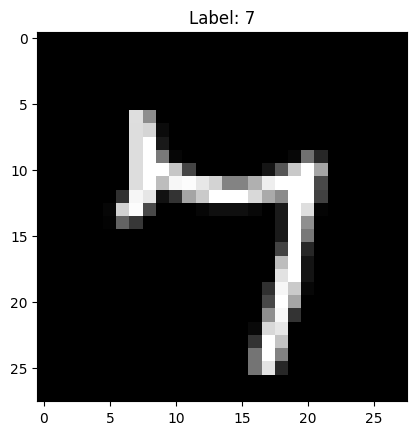

In [14]:
images,labels = next(iter(data_loader))

print("Images shape:",images.shape)
print("Labels",labels)

import matplotlib.pyplot as plt 

plt.imshow(images[0].squeeze(),cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.show()

#### Here I downloaded the mnist dataset the  you can see images shape , where batch size 4 and image shape is 1,28,28 


### Let me also check how many unqiue labels or numbers are there in dataset 

In [17]:
### 



unique_labels = torch.unique(dataset.targets)

print("Unique labels in MNIST dataset",unique_labels,"and the count is ",len(unique_labels))

Unique labels in MNIST dataset tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) and the count is  10


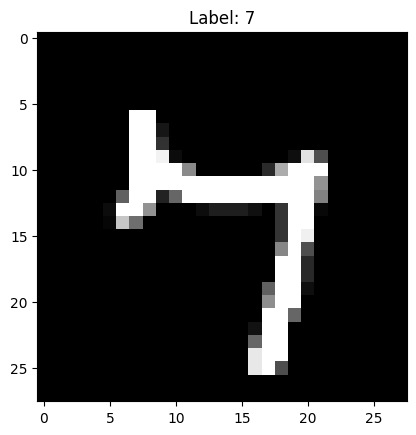

In [31]:
from matplotlib.colors import Normalize
plt.imshow(images[0].squeeze(),cmap='gray',norm=Normalize(vmin=0, vmax=0.5))
plt.title(f"Label: {labels[0].item()}")
plt.show()

## Let's check the dataloader size  

15000 

In [35]:
len(data_loader)

15000

#### Let's build the network architecture 

In [45]:
input_image_size = 28 * 28 
one_hidden_layer = 128 
output_layer_size = len(unique_labels)
activation_function = "Relu"

#### Split the dataset in to train and test dataset 

In [46]:
from pydash import shuffle
from torch.utils.data import random_split


total_size = len(dataset)

train_size = int(0.8 * total_size)
test_size = total_size - train_size 

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=4,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=4,shuffle=False)

print("Training set size",len(train_dataset))
print("Testing set size",len(test_dataset))

Training set size 48000
Testing set size 12000


In [47]:
import torch 


In [48]:
class MNIST(torch.nn.Module):
    def __init__(self,input_image_size,output_layer_size,hidden_layers):
        super(MNIST,self).__init__()

        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(input_image_size,hidden_layers)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_layers,output_layer_size)

    def forward(self,x):

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x




        

In [49]:
model = MNIST(input_image_size=input_image_size,output_layer_size=output_layer_size,hidden_layers=one_hidden_layer)

In [52]:
### what are the loss functions 


loss_fn = torch.nn.CrossEntropyLoss()


In [53]:
import torch.optim as optim 

optimizer = optim.Adam(model.parameters(),lr=0.01)

In [55]:
### Training the dataset


num_epochs = 10


for epoch in range(num_epochs):

    print(f"Epoch : {epoch+1}/{num_epochs}")

    for batch_idx, (inputs,targets) in enumerate(train_loader):

        predictions = model(inputs)

        loss = loss_fn(predictions,targets)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch_idx % 1000 == 0:
            print(f"Batch {batch_idx+1}, loss: {loss.item():.4f}")

Epoch : 1/10
Batch 1, loss: 0.0000
Batch 1001, loss: 0.0507
Batch 2001, loss: 0.0002
Batch 3001, loss: 1.4075
Batch 4001, loss: 0.0123
Batch 5001, loss: 0.0124
Batch 6001, loss: 0.0012
Batch 7001, loss: 0.0002
Batch 8001, loss: 0.3464
Batch 9001, loss: 0.0036
Batch 10001, loss: 0.0131
Batch 11001, loss: 0.0000
Epoch : 2/10
Batch 1, loss: 1.9388
Batch 1001, loss: 0.0001
Batch 2001, loss: 0.0020
Batch 3001, loss: 1.7309
Batch 4001, loss: 0.0010
Batch 5001, loss: 0.0005
Batch 6001, loss: 0.8255
Batch 7001, loss: 0.0001
Batch 8001, loss: 2.6252
Batch 9001, loss: 0.0000
Batch 10001, loss: 0.1807
Batch 11001, loss: 0.0004
Epoch : 3/10
Batch 1, loss: 0.6139
Batch 1001, loss: 0.0001
Batch 2001, loss: 0.0022
Batch 3001, loss: 0.0009
Batch 4001, loss: 0.8900
Batch 5001, loss: 0.0012
Batch 6001, loss: 0.1527
Batch 7001, loss: 0.0248
Batch 8001, loss: 0.0012
Batch 9001, loss: 0.0148
Batch 10001, loss: 0.3168
Batch 11001, loss: 0.0148
Epoch : 4/10
Batch 1, loss: 0.5730
Batch 1001, loss: 0.2233
Batc

In [56]:
#### Evaluation Loop 

model.eval()



MNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [64]:
def evaluate_model(model,eval_dataloader,criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0 

    with torch.no_grad():
        for inputs,labels in eval_dataloader:
            outputs = model(inputs)

            loss = criterion(outputs,labels)

            batch_size = labels.size()

            print(batch_size[0], labels.size())
            total_loss += loss.item() * batch_size[0]

            total_samples += batch_size[0]

            _ , predicted = torch.max(outputs.data,1)

            correct_predictions += (predicted == labels).sum().item()

    
    avg_loss = total_loss / total_samples

    accuracy = 100 * correct_predictions / total_samples


    return avg_loss,accuracy


            



loss, accuracy  = evaluate_model(model,test_loader,loss_fn)


4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Si

In [65]:
loss,accuracy

(0.5097919149192779, 92.8)

In [67]:
def random_test(images,labels):

    with torch.no_grad():
        outputs = model(images)

        _, predicted = torch.max(outputs.data,1)
    num_samples = len(images)
    fig,axes = plt.subplots(1,num_samples,figsize=(15,3))

    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(),cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f'Pred : {predicted[i]} \n True : {labels[i]} ')

        

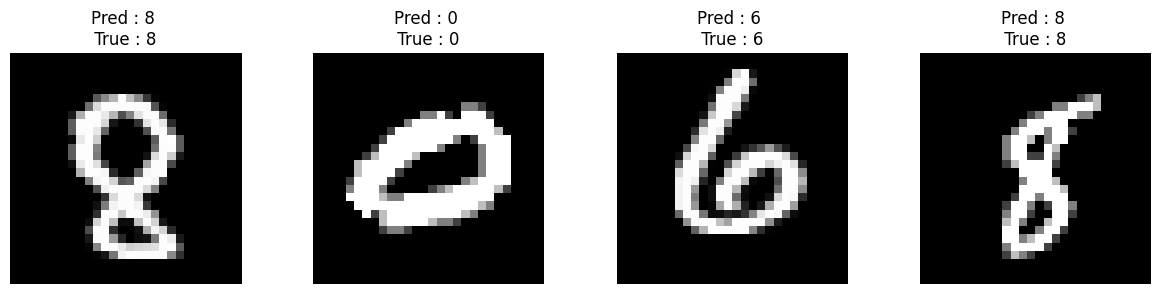

In [68]:
images , labels = next(iter(test_loader))

random_test(images,labels)

In [69]:
def analyze_model(model):
    # Print model architecture
    print("Model Architecture:")
    print(model)
    print("\nModel Parameters:")
    
    # Analyze weights
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"\n{name} statistics:")
            print(f"Mean: {param.data.mean():.4f}")
            print(f"Std: {param.data.std():.4f}")
            print(f"Min: {param.data.min():.4f}")
            print(f"Max: {param.data.max():.4f}")
            
            # Visualize weight distributions
            plt.figure(figsize=(6, 4))
            plt.hist(param.data.flatten().cpu().numpy(), bins=50)
            plt.title(f'{name} Distribution')
            plt.xlabel('Weight Value')
            plt.ylabel('Count')
            plt.show()

Model Architecture:
MNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Model Parameters:

fc1.weight statistics:
Mean: -0.0988
Std: 1.0130
Min: -19.5413
Max: 10.8088


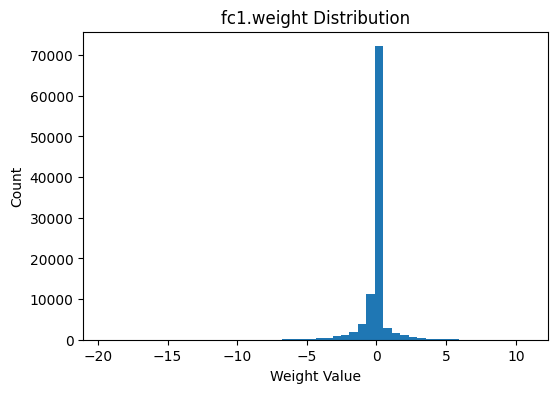


fc2.weight statistics:
Mean: -0.9709
Std: 1.8176
Min: -16.3196
Max: 1.0838


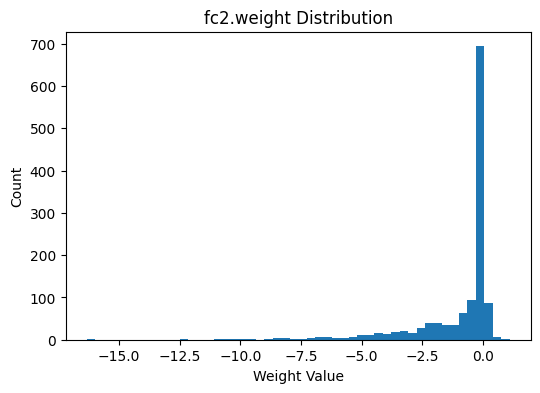

In [70]:
analyze_model(model)

In [73]:
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, './models/mnist_checkpoint.pth')

In [75]:
# Load the checkpoint
checkpoint = torch.load('./models/mnist_checkpoint.pth')

# First define the model architecture
model = MNIST(input_image_size=input_image_size, 
              output_layer_size=output_layer_size, 
              hidden_layers=one_hidden_layer)

# Load the model state dict from checkpoint
model.load_state_dict(checkpoint['model_state_dict'])

# If you need optimizer state too:
optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Set model to evaluation mode
model.eval()

C:\Users\Kavitha padala\AppData\Local\Temp\ipykernel_31024\2370635622.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('./models/mnist_checkpoint.

MNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [150]:
# from PIL import Image 
# import torchvision.transforms.functional as TF 
# def preprocess_image(image_path):

#     img = Image.open(image_path).convert('L')

#     img = img.resize((28,28))

#     img_tensor = TF.to_tensor(img)
#     plt.imshow(img,cmap='gray')
    
#     img_tensor = img_tensor.unsqueeze(0)

#     return img_tensor
from PIL import Image, ImageOps
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # 1. Open and convert to grayscale
    img = Image.open(image_path).convert('L')
    
    # 2. Invert (if background is white and digit is black)
    img = ImageOps.invert(img)

    # 3. Crop extra whitespace around the digit
    img = ImageOps.autocontrast(img)

    # 4. Resize and pad to 28x28 while keeping aspect ratio
    img = ImageOps.fit(img, (28, 28), method=Image.Resampling.LANCZOS)

    # 5. Convert to tensor
    img_tensor = TF.to_tensor(img)

    # 6. Normalize like MNIST
    transform_norm = transforms.Normalize((0.1307,), (0.3081,))
    img_tensor = transform_norm(img_tensor)

    # 7. Add batch dimension
    img_tensor = img_tensor.unsqueeze(0)

    # Show processed image
    plt.imshow(img_tensor.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

    return img_tensor





Output tensor([[ -578.6822,  -263.2525,  -130.5692,  -248.1430, -1177.0797,  -287.8312,
          -464.5009,  -562.9728,  -347.2018,  -973.6271]])
predictions tensor([2])
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 1.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


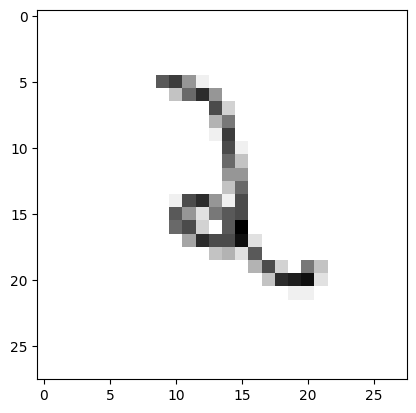

In [87]:
def predict_digit(model, image_tensor):

    model.eval()

    with torch.no_grad():
        output = model(image_tensor)
        print("Output",output)
        _,predicted = torch.max(output.data,1)
        print("predictions",predicted)        
        probabilities = torch.nn.functional.softmax(output,dim=1)


        return predicted.item(),probabilities[0]
    

img_tensor = preprocess_image('./datasets/MNSIT/testing_model.png')

predicted_digit,probabilities = predict_digit(model,img_tensor)

for digit, prob in enumerate(probabilities):
    print(f"Digit {digit}: {prob:.4f}")



Output tensor([[ -589.9757,  -275.9997,  -134.5260,  -262.4241, -1252.4728,  -305.3760,
          -473.7039,  -591.9383,  -369.9049, -1039.6613]])
predictions tensor([2])
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 1.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


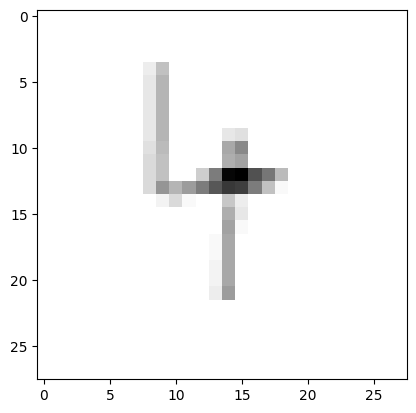

In [88]:

img_tensor = preprocess_image('./datasets/MNSIT/testing_model_4_2.png')

predicted_digit,probabilities = predict_digit(model,img_tensor)

for digit, prob in enumerate(probabilities):
    print(f"Digit {digit}: {prob:.4f}")


Output tensor([[ -571.7838,  -263.2792,  -128.0474,  -249.5849, -1187.2948,  -289.8964,
          -456.6421,  -563.2290,  -347.1755,  -983.5958]])
predictions tensor([2])
2
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 1.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


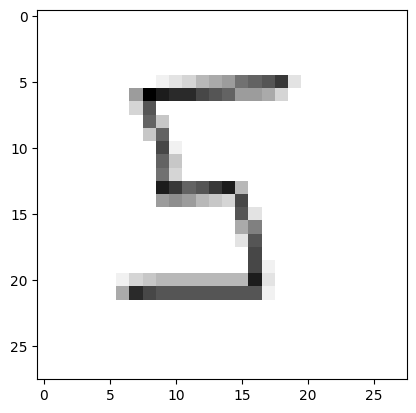

In [91]:

img_tensor = preprocess_image('./datasets/MNSIT/testing_model_5.png')

predicted_digit,probabilities = predict_digit(model,img_tensor)

print(predicted_digit)
for digit, prob in enumerate(probabilities):
    print(f"Digit {digit}: {prob:.4f}")

In [102]:
from sklearn.metrics import confusion_matrix,classification_report

import seaborn as sns 

import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np


In [125]:
def evaluate_model_metrics(model, test_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    # Generate classification report
    report = classification_report(all_targets, all_predictions, output_dict=True)

    # Create confusion matrix (renamed variable to conf_matrix)
    conf_matrix = confusion_matrix(all_targets, all_predictions)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print metrics
    print("\nModel Performance Metrics:")
    print("-" * 50)
    print(f"Overall Accuracy: {report['accuracy']:.4f}")
    
    print("\nPer-digit Metrics:")
    print("-" * 50)
    print(f"{'Digit':<6} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 50)
    
    for digit in range(10):
        metrics = report[str(digit)]
        print(f"{digit:<6} {metrics['precision']:<10.4f} {metrics['recall']:<10.4f} {metrics['f1-score']:<10.4f}")
    
    return report, conf_matrix

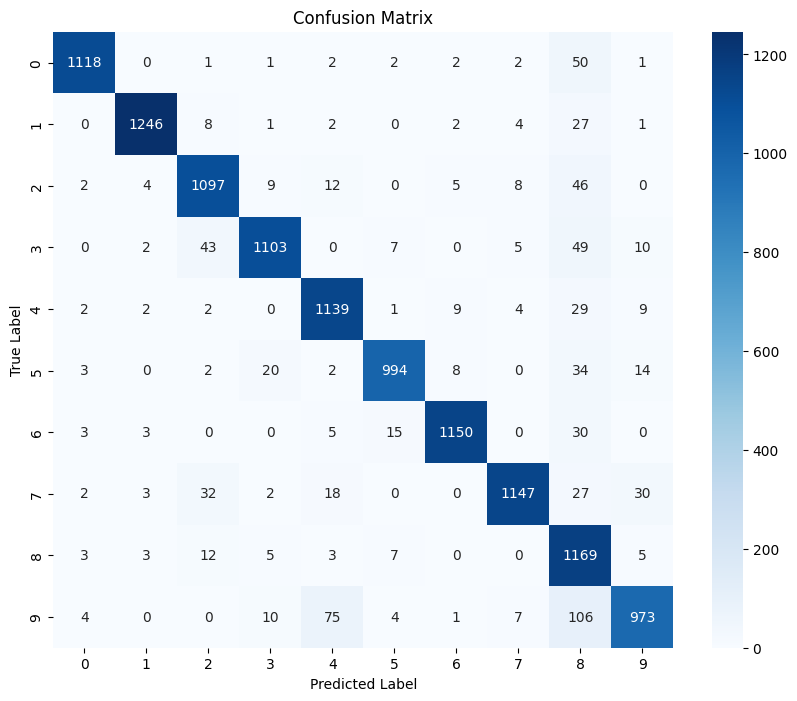


Model Performance Metrics:
--------------------------------------------------
Overall Accuracy: 0.9280

Per-digit Metrics:
--------------------------------------------------
Digit  Precision  Recall     F1-Score  
--------------------------------------------------
0      0.9833     0.9483     0.9655    
1      0.9865     0.9651     0.9757    
2      0.9165     0.9273     0.9218    
3      0.9583     0.9048     0.9308    
4      0.9054     0.9515     0.9279    
5      0.9650     0.9229     0.9435    
6      0.9771     0.9536     0.9652    
7      0.9745     0.9096     0.9409    
8      0.7460     0.9685     0.8428    
9      0.9329     0.8246     0.8754    


In [104]:
# Run the comprehensive evaluation
report, confusion_matrix = evaluate_model_metrics(model, test_loader)

### Let improve the model to improve the accuracy 

In [117]:



class ImprovedMNIST(torch.nn.Module):
    def __init__(self, input_image_size, output_layer_size, hidden_layers):
        super(ImprovedMNIST, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(input_image_size, hidden_layers)
        self.bn1 = torch.nn.BatchNorm1d(hidden_layers)  # Add batch normalization
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(0.3)  # Add dropout
        self.fc2 = torch.nn.Linear(hidden_layers, output_layer_size)
    def forward(self,x):
        x= self.flatten(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [118]:
model = ImprovedMNIST(input_image_size=input_image_size,output_layer_size=output_layer_size,hidden_layers=one_hidden_layer)

In [121]:
from pydash import shuffle
from torch.utils.data import random_split


total_size = len(dataset)

train_size = int(0.8 * total_size)
test_size = total_size - train_size 

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=16,shuffle=False)

print("Training set size",len(train_dataset))
print("Testing set size",len(test_dataset))

Training set size 48000
Testing set size 12000


In [122]:
num_epochs = 10


for epoch in range(num_epochs):

    print(f"Epoch : {epoch+1}/{num_epochs}")

    for batch_idx, (inputs,targets) in enumerate(train_loader):

        predictions = model(inputs)

        loss = loss_fn(predictions,targets)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch_idx % 1000 == 0:
            print(f"Batch {batch_idx+1}, loss: {loss.item():.4f}")

Epoch : 1/10
Batch 1, loss: 2.3054
Batch 1001, loss: 2.4915
Batch 2001, loss: 2.3734
Epoch : 2/10
Batch 1, loss: 2.3253
Batch 1001, loss: 2.3553
Batch 2001, loss: 2.2503
Epoch : 3/10
Batch 1, loss: 2.3572
Batch 1001, loss: 2.3140
Batch 2001, loss: 2.2225
Epoch : 4/10
Batch 1, loss: 2.2217
Batch 1001, loss: 2.3417
Batch 2001, loss: 2.3295
Epoch : 5/10
Batch 1, loss: 2.3540
Batch 1001, loss: 2.2191
Batch 2001, loss: 2.2172
Epoch : 6/10
Batch 1, loss: 2.5115
Batch 1001, loss: 2.3932
Batch 2001, loss: 2.3714
Epoch : 7/10
Batch 1, loss: 2.6261
Batch 1001, loss: 2.3361
Batch 2001, loss: 2.2582
Epoch : 8/10
Batch 1, loss: 2.2157
Batch 1001, loss: 2.3307
Batch 2001, loss: 2.3428
Epoch : 9/10
Batch 1, loss: 2.2331
Batch 1001, loss: 2.4147
Batch 2001, loss: 2.2913
Epoch : 10/10
Batch 1, loss: 2.3733
Batch 1001, loss: 2.4441
Batch 2001, loss: 2.4297


In [114]:
model

ImprovedMNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [127]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix  # Rename import
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np



In [128]:
def evaluate_model_metrics(model, test_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    # Generate classification report
    report = classification_report(all_targets, all_predictions, output_dict=True)

    # Create confusion matrix using renamed function
    conf_matrix = sk_confusion_matrix(all_targets, all_predictions)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print metrics
    print("\nModel Performance Metrics:")
    print("-" * 50)
    print(f"Overall Accuracy: {report['accuracy']:.4f}")
    
    print("\nPer-digit Metrics:")
    print("-" * 50)
    print(f"{'Digit':<6} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 50)
    
    for digit in range(10):
        metrics = report[str(digit)]
        print(f"{digit:<6} {metrics['precision']:<10.4f} {metrics['recall']:<10.4f} {metrics['f1-score']:<10.4f}")
    
    return report, conf_matrix

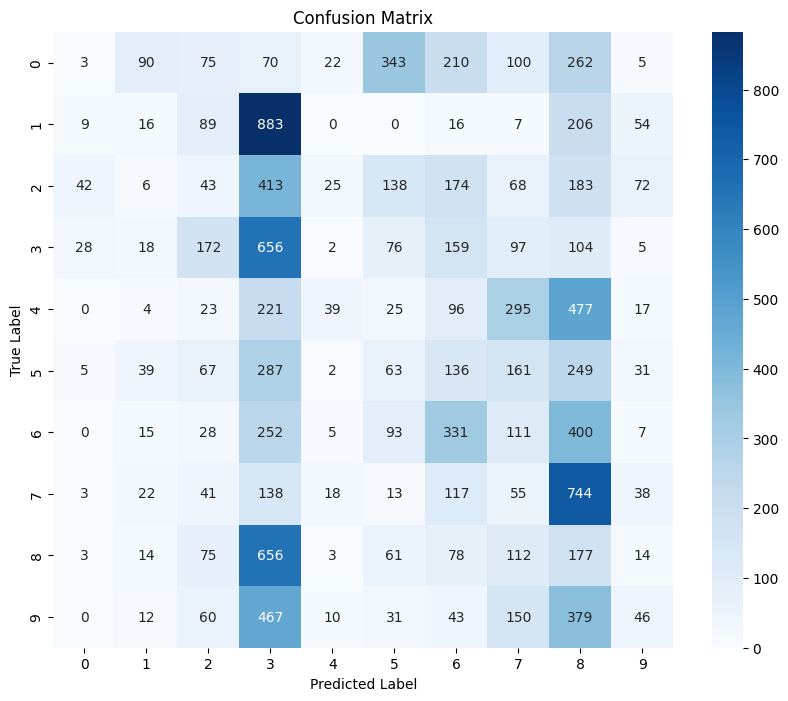


Model Performance Metrics:
--------------------------------------------------
Overall Accuracy: 0.1191

Per-digit Metrics:
--------------------------------------------------
Digit  Precision  Recall     F1-Score  
--------------------------------------------------
0      0.0323     0.0025     0.0047    
1      0.0678     0.0125     0.0211    
2      0.0639     0.0369     0.0468    
3      0.1623     0.4981     0.2448    
4      0.3095     0.0326     0.0590    
5      0.0747     0.0606     0.0669    
6      0.2434     0.2665     0.2544    
7      0.0476     0.0463     0.0469    
8      0.0556     0.1484     0.0809    
9      0.1592     0.0384     0.0619    


In [129]:
# Run the evaluation
report, conf_matrix = evaluate_model_metrics(model, test_loader)

In [130]:
class EnhancedMNIST(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(EnhancedMNIST, self).__init__()
        
        # Architecture
        self.flatten = torch.nn.Flatten()
        
        # First layer
        self.fc1 = torch.nn.Linear(input_size, 256)
        self.bn1 = torch.nn.BatchNorm1d(256)
        
        # Second layer
        self.fc2 = torch.nn.Linear(256, 128)
        self.bn2 = torch.nn.BatchNorm1d(128)
        
        # Output layer
        self.fc3 = torch.nn.Linear(128, output_size)
        
        # Activations
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(0.2)  # Reduced dropout rate
        
    def forward(self, x):
        x = self.flatten(x)
        
        # First block
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # Second block
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # Output
        x = self.fc3(x)
        return x

In [136]:
# Model initialization
model = EnhancedMNIST(input_size=28*28, output_size=10)

# Better optimizer settings
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate

# Larger batch size for stable batch norm
train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=32,  # Increased batch size
    shuffle=True
)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min',
    factor=0.5,
    patience=3
)

In [137]:
def train_model(model, train_loader, test_loader, epochs=15):
    best_accuracy = 0
    train_losses = []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if batch_idx % 100 == 0:
                print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}")
        
        # Evaluate after each epoch
        val_loss, accuracy = evaluate_model(model, test_loader, loss_fn)
        train_losses.append(running_loss / len(train_loader))
        
        # Learning rate adjustment
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1} complete:")
        print(f"Training Loss: {train_losses[-1]:.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print(f"Accuracy: {accuracy:.2f}%")
        print("-" * 50)

In [138]:
train_model(model,train_loader,test_loader,10)

Epoch 1, Batch 0, Loss: 2.4044
Epoch 1, Batch 100, Loss: 0.3486
Epoch 1, Batch 200, Loss: 0.2591
Epoch 1, Batch 300, Loss: 0.2679
Epoch 1, Batch 400, Loss: 0.2007
Epoch 1, Batch 500, Loss: 0.4480
Epoch 1, Batch 600, Loss: 0.3175
Epoch 1, Batch 700, Loss: 0.2202
Epoch 1, Batch 800, Loss: 0.3727
Epoch 1, Batch 900, Loss: 0.0619
Epoch 1, Batch 1000, Loss: 0.1753
Epoch 1, Batch 1100, Loss: 0.1386
Epoch 1, Batch 1200, Loss: 0.1507
Epoch 1, Batch 1300, Loss: 0.5058
Epoch 1, Batch 1400, Loss: 0.1424
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16 torch.Size([16])
16

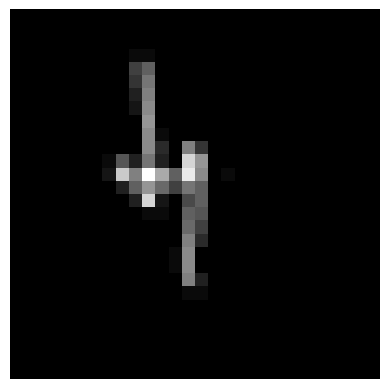

Output tensor([[-54.2643,  13.5578, -30.5604, -37.0470,   1.8452,   3.1400, -64.6109,
          -2.7316, -60.1367, -38.0570]])
predictions tensor([1])
1
Digit 0: 0.0000
Digit 1: 1.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [153]:

img_tensor = preprocess_image('./datasets/MNSIT/testing_model_4.png')

predicted_digit,probabilities = predict_digit(model,img_tensor)

print(predicted_digit)
for digit, prob in enumerate(probabilities):
    print(f"Digit {digit}: {prob:.4f}")

In [146]:
images,labels = next(iter(test_loader))



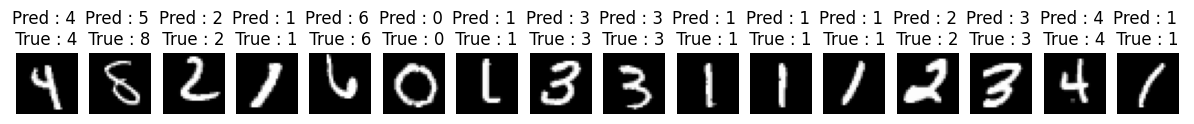

In [147]:
random_test(images,labels)